In [1]:
from data_utils import BYOLTransform, NoTransform

In [2]:
a = BYOLTransform(((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)))

In [3]:
from torchvision.datasets import CIFAR10

In [4]:
t = CIFAR10("./data/CIFAR10/", False, a)

In [6]:
a, b=next(iter(t))

In [8]:
len(a)

3

In [1]:
from modules import EMAHelper, AverageMeter
from modules import BYOL_loss, Classifier_loss
from modules import ResNetModel, LinearClassifier

In [2]:
from args import args_parser
args = args_parser()

In [4]:
import torch
DEVICE = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

online_network = ResNetModel(args, "online").to(DEVICE) 
target_network = ResNetModel(args, "target").to(DEVICE)

c:\Users\David\AppData\Local\pypoetry\Cache\virtualenvs\byol-pytorch-BuxpsX5h-py3.9\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\David\AppData\Local\pypoetry\Cache\virtualenvs\byol-pytorch-BuxpsX5h-py3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [13]:
ema_helper = EMAHelper(args.epochs, args.base_tau)
ema_helper.register(target_network)

In [14]:
ema_helper.update(online_network, 1)
ema_helper.ema(target_network)

In [11]:
target_network =target_network.eval()

In [16]:
target_network.eval()

ResNetModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [17]:
from data_utils import DataManager

In [18]:
data_manager = DataManager(args)

100%|██████████| 170498071/170498071 [00:49<00:00, 3422510.38it/s]


Extracting ./data/CIFAR10\cifar-10-python.tar.gz to ./data/CIFAR10
Files already downloaded and verified


In [19]:
test_loader = data_manager.get_loader("test")

In [20]:
images, labels = next(iter(test_loader))

In [21]:
images = images.to(DEVICE)

In [51]:
dir(target_network.backbone)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_impl',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_make_layer',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_norm_layer',
 '_parameters',
 '_r

In [ ]:
torch.empty(

In [49]:
test_embeddings.detach().cpu()

tensor([[0.1354, 1.6037, 0.1032,  ..., 0.0000, 0.4086, 0.1348],
        [0.1068, 1.4006, 0.1272,  ..., 0.0000, 0.4595, 0.3131],
        [0.1039, 1.8626, 0.1056,  ..., 0.0000, 0.4006, 0.1962],
        ...,
        [0.1600, 2.1966, 0.1531,  ..., 0.0000, 0.7679, 0.2183],
        [0.1047, 2.1464, 0.1583,  ..., 0.0000, 0.6605, 0.6020],
        [0.1173, 1.9514, 0.1254,  ..., 0.0000, 0.8367, 0.2367]])

In [94]:
test_embeddings = target_network(images, return_embedding=True)

In [95]:
test_embeddings = test_embeddings.detach().cpu()

In [97]:
test_embeddings

tensor([[0.1354, 1.6037, 0.1032,  ..., 0.0000, 0.4086, 0.1348],
        [0.1068, 1.4006, 0.1272,  ..., 0.0000, 0.4595, 0.3131],
        [0.1039, 1.8626, 0.1056,  ..., 0.0000, 0.4006, 0.1962],
        ...,
        [0.1600, 2.1966, 0.1531,  ..., 0.0000, 0.7679, 0.2183],
        [0.1047, 2.1464, 0.1583,  ..., 0.0000, 0.6605, 0.6020],
        [0.1173, 1.9514, 0.1254,  ..., 0.0000, 0.8367, 0.2367]])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 128 samples in 0.001s...
[t-SNE] Computed neighbors for 128 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 128 / 128
[t-SNE] Mean sigma: 2.314421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.130051
[t-SNE] KL divergence after 1000 iterations: 0.330979


C:\Users\David\AppData\Local\Temp\ipykernel_7500\2512808821.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


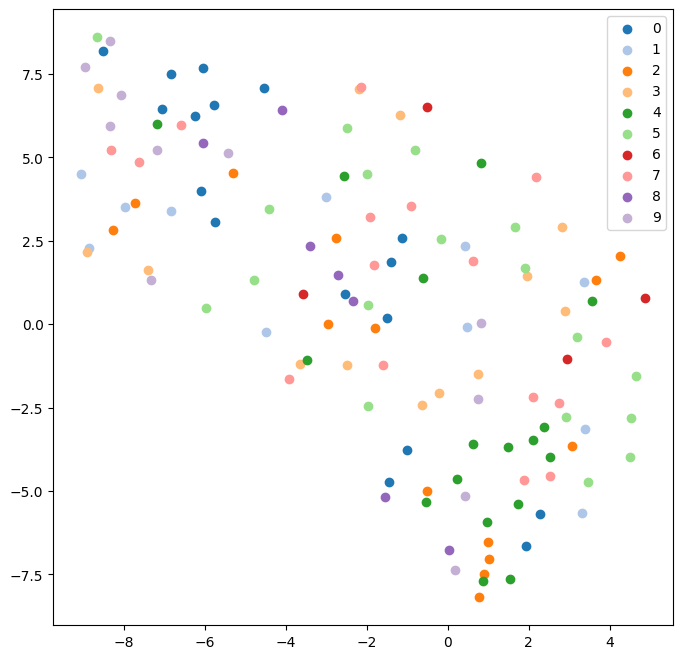

In [96]:
from sklearn.manifold import TSNE
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(test_embeddings)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
figure = plt.figure(1, figsize=(8, 8))
num_categories = 10
for lab in range(num_categories):
    indices = labels == lab
    plt.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab, alpha=1)
plt.legend(markerscale=1)
plt.savefig("test.png", dpi=800)

In [60]:
from torchvision.models import resnet18, resnet50
from torch import nn

In [70]:
temp = resnet18(pretrained=True)
temp.fc = nn.Identity()

c:\Users\David\AppData\Local\pypoetry\Cache\virtualenvs\byol-pytorch-BuxpsX5h-py3.9\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\David\AppData\Local\pypoetry\Cache\virtualenvs\byol-pytorch-BuxpsX5h-py3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [67]:
temp = temp.cuda()

In [68]:
temp(images).size()

torch.Size([128, 2048])

In [80]:
a=torch.empty((0, 512))

In [71]:
temp = temp.cuda()

In [72]:
out = temp(images)

In [74]:
out = out.detach().cpu()

In [83]:
a = torch.cat([a, out])


In [84]:
a.size()

torch.Size([256, 512])

In [86]:
labels.size()

torch.Size([128])

In [90]:
a=torch.empty((0))

In [92]:
a = torch.cat((a, labels))

In [93]:
a.size()

torch.Size([256])